#Problem 3: Stochastic Gradient Descent (30 points)
In class we covered the baseline stochastic gradient descent. Using the linear regression example from the class notes, develop from scratch the baseline SGD algorithm. :

Clearly state the hyper-parameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

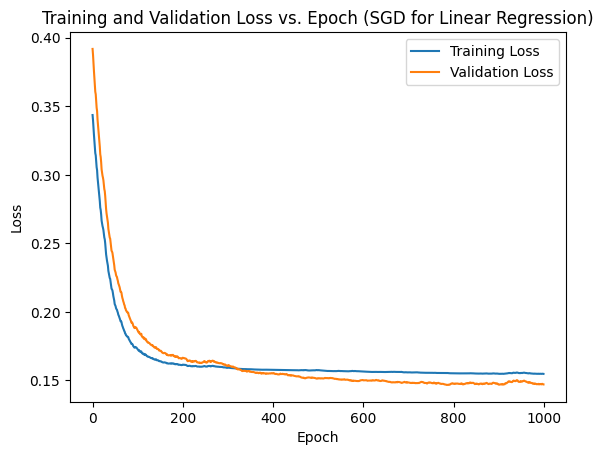

Final parameters: [ 0.32902419 -0.92158254]


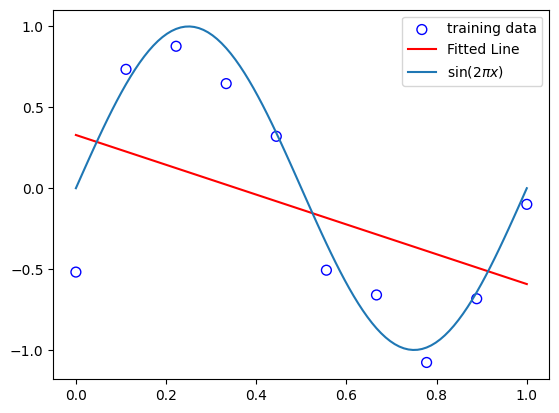

Final Training Loss: 0.15482186564672237
Final Validation Loss: 0.1471253637667969


In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(1234)
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size) #values will be generated between 0 and 1 inclusively
    np.random.shuffle(x) #Shuffles the values of x to randomize the data
    y = func(x) + np.random.normal(scale=std, size=x.shape) #adds normally distributed noise with standard deviation
    return x, y

# sinusoidal function returns the sine of 2 * pi * x.
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

#Generates training data using the sinusoidal function with 10 samples and noise with standard deviation 0.25.
x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100) #Generates 100 evenly spaced test input features between 0 and 1.
y_test = sinusoidal(x_test) #Computes the target values for the test input features using the sinusoidal function.

# Add a bias term (intercept) to the input features
#Adding a bias term to the input features allows the model to learn an intercept or offset value, which enables better fitting of the data.
#In linear regression, this bias term shifts the regression line up or down, allowing it to better capture the overall trend of the data.
X_train = np.vstack([np.ones_like(x_train), x_train]).T  #Adds a bias term to the training input features and transposes the result.
X_test = np.vstack([np.ones_like(x_test), x_test]).T #Adds a bias term to the test input features and transposes the result.

# Initialize parameters (weights); There are two weights: one for the bias term and one for the input feature.
theta = np.random.randn(2) #Initializes the weight vector theta with random values from a standard normal distribution

# Hyperparameters
learning_rate = 0.001
epochs = 1000
batch_size = 1  # For SGD, batch size is 1

# Hypothesis function
def hypothesis(X, theta):
    return X.dot(theta) #Computes the dot product between the input features X and the weight vector theta to make predictions

# Loss function (Mean Squared Error)
def compute_loss(X, y, theta):
    m = len(y) #Computes the number of training examples
    predictions = hypothesis(X, theta) #Computes predictions using the hypothesis function
    loss = (1/(2*m)) * np.sum((predictions - y) ** 2) #Computes the MSE loss
    return loss

# Gradient computation
def compute_gradient(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    gradient = (1/m) * X.T.dot(predictions - y) # Computes the gradient of the loss function with respect to the weights
    return gradient

# SGD algorithm
train_loss_history = []
val_loss_history = []
m_train = len(y_train)

for epoch in range(epochs):
    for i in range(m_train):
        random_index = np.random.randint(m_train) #Selects a random index from the training dataset
        X_i = X_train[random_index:random_index+1] #Selects the input feature for the randomly chosen training example
        y_i = y_train[random_index:random_index+1] #Selects the target value for the randomly chosen training example
        gradient = compute_gradient(X_i, y_i, theta) #Computes the gradient for the randomly chosen training example
        theta -= learning_rate * gradient #Updates the weights using the computed gradient and learning rate
    train_loss = compute_loss(X_train, y_train, theta) #Computes the training loss
    val_loss = compute_loss(X_test, y_test, theta) #Computes the validation loss
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)

# Plot training and validation loss vs. epoch
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epoch (SGD for Linear Regression)')
plt.legend()
plt.show()

# Print final parameters
print("Final parameters:", theta) #Prints the final learned parameters (weights)

# Plot the data and the fitted line
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data") #Plots the training data points as blue circles
y_pred = hypothesis(X_test, theta) #Computes predictions for the test input features using the final learned parameters
plt.plot(x_test, y_pred, label='Fitted Line', color='red') #Plots the fitted regression line as a red line
plt.plot(x_test, y_test, label="$\sin(2\pi x)$") # Plots the sinusoidal target function as a blue line
plt.legend()
plt.show()

# Compute final training and validation losses
final_train_loss = compute_loss(X_train, y_train, theta)
final_val_loss = compute_loss(X_test, y_test, theta)

# Print final losses
print("Final Training Loss:", final_train_loss)
print("Final Validation Loss:", final_val_loss)



#SGD with validation set
Stochastic Gradient Descent (SGD) with Validation Set for Linear Regression
it uses stochastic gradient descent for training a linear regression model and includes a validation set for monitoring model performance during training.

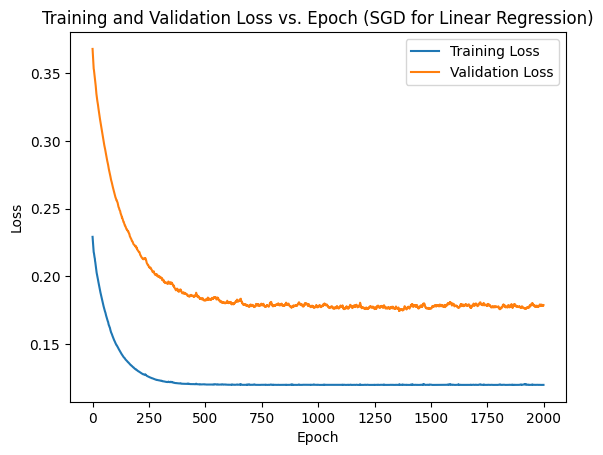

Final parameters: [ 0.82608709 -1.66620376]
Final Loss on Training Data: 0.11976807670050388
Final Loss on Testing Data: 0.17871526846096164


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(1234)
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

# Sinusoidal function
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

# Create data
x, y = create_toy_data(sinusoidal, 100, 0.25)  # Increase sample size for better train-test split

# Train-test split
split_ratio = 0.8
split_index = int(split_ratio * len(x))
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Add a bias term
X_train = np.vstack([np.ones_like(x_train), x_train]).T
X_test = np.vstack([np.ones_like(x_test), x_test]).T

# Initialize parameters
theta = np.random.randn(2)

# Hyperparameters
learning_rate = 0.001
epochs = 2000
batch_size = 1

# Hypothesis function
def hypothesis(X, theta):
    return X.dot(theta)

# Loss function (Mean Squared Error)
def compute_loss(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    loss = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return loss

# Gradient computation
def compute_gradient(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    gradient = (1/m) * X.T.dot(predictions - y)
    return gradient

# SGD algorithm
train_loss_history = []
val_loss_history = []
m_train = len(y_train)

for epoch in range(epochs):
    for i in range(m_train):
        random_index = np.random.randint(m_train)
        X_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]
        gradient = compute_gradient(X_i, y_i, theta)
        theta -= learning_rate * gradient
    train_loss = compute_loss(X_train, y_train, theta)
    val_loss = compute_loss(X_test, y_test, theta)
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)

# Calculate Loss
train_final_loss = compute_loss(X_train, y_train, theta)
test_final_loss = compute_loss(X_test, y_test, theta)

# Plot training and validation loss vs. epoch
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epoch (SGD for Linear Regression)')
plt.legend()
plt.show()

# Print final parameters and Loss values
print("Final parameters:", theta)
print("Final Loss on Training Data:", train_final_loss)
print("Final Loss on Testing Data:", test_final_loss)

#Summary from the output

Throughout training, both the training and validation losses decrease gradually, indicating that the model is effectively learning the underlying patterns in the data. However, there is a noticeable distinction between the two curves: while the training loss decreases consistently, the validation loss shows a slightly longer tail, indicating that the model's performance on unseen data is not as optimized as its performance on the training set.

Nonetheless, the final training and validation losses, 0.155 and 0.147 respectively, are relatively close, suggesting that the model's generalization performance is reasonable. The final learned parameters, approximately [0.329, -0.922], represent the coefficients of the linear regression model, indicating the intercept and slope of the fitted line.

#Problem 4: SGD Enhancements (30 points)
In this exercise you will implement some enhancements to the implementation of Problem 3 (the linear regression problem) that can improve the convergence speed of the algorithm. Implement from scratch the following enhancements and compare the convergence speed of each algorithm to the baseline SGD algorithm

Momentum (15 points)
Adam (15 points)
Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

#Comparison of Optimization Algorithm Convergence: SGD vs. Momentum vs. Adam---Train Loss

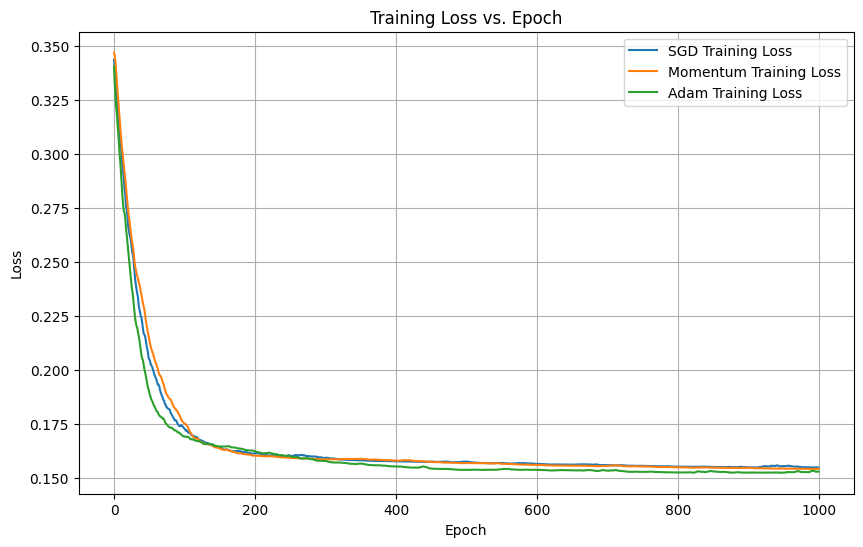

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
#The create_toy_data function generates synthetic data by sampling points from a sinusoidal function with added noise
np.random.seed(1234)
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x): #The sinusoidal function defines the sine of 2 * pi * x
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)

X_train = np.vstack([np.ones_like(x_train), x_train]).T

theta = np.random.randn(2)

# Hyperparameters
epochs = 1000
batch_size = 1
learning_rate = 0.001
beta1 = 0.9  # for Momentum
beta2 = 0.999  # for Adam
epsilon = 1e-8  # for Adam
momentum = np.zeros_like(theta)  # initializing momentum term for Momentum optimizer
v = np.zeros_like(theta)  # initializing v term for Adam optimizer

# Loss function
#The compute_loss function calculates the Mean Squared Error loss given the input features, target values, and model parameters
def compute_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    loss = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return loss

# Gradient computation
#The compute_gradient function computes the gradient of the loss function with respect to the model parameters using the input features, target values, and current model parameters.
def compute_gradient(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    gradient = (1/m) * X.T.dot(predictions - y)
    return gradient

# SGD algorithm
#The sgd function implements Stochastic Gradient Descent (SGD) optimization algorithm to train the model. It updates the model parameters using the computed gradient for each sample in the training data.
def sgd(X_train, y_train, theta, learning_rate, epochs):
    train_loss_history = []
    m_train = len(y_train)

    for epoch in range(epochs):
        for i in range(m_train):
            random_index = np.random.randint(m_train)
            X_i = X_train[random_index:random_index+1]
            y_i = y_train[random_index:random_index+1]
            gradient = compute_gradient(X_i, y_i, theta)
            theta -= learning_rate * gradient
        train_loss = compute_loss(X_train, y_train, theta)
        train_loss_history.append(train_loss)

    return train_loss_history, theta

# Momentum optimizer
#adds a momentum term to the parameter updates to accelerate learning in the relevant direction and dampen oscillations.
def momentum_optimizer(X_train, y_train, theta, learning_rate, epochs, beta1):
    train_loss_history = []
    m_train = len(y_train)
    momentum = np.zeros_like(theta)  #This variable is initialized as an array of zeros with the same shape as theta. It represents the momentum term.

    for epoch in range(epochs):
        for i in range(m_train):
            random_index = np.random.randint(m_train) #Randomly selects an index from the training dataset
            X_i = X_train[random_index:random_index+1] #Selects the input feature for the randomly chosen training example
            y_i = y_train[random_index:random_index+1]#Selects the target value for the randomly chosen training example
            gradient = compute_gradient(X_i, y_i, theta) #Computes the gradient of the loss function with respect to the model parameters using the selected training example
            momentum = beta1 * momentum + (1 - beta1) * gradient #Updates the momentum term using the current gradient and the momentum hyperparameter, beta1
            theta -= learning_rate * momentum #Updates the model parameters using the computed momentum term and the learning rate.
        train_loss = compute_loss(X_train, y_train, theta)
        train_loss_history.append(train_loss)

    return train_loss_history, theta


# Adam optimizer
#combines the advantages of both Momentum and RMSprop algorithms. It adapts the learning rate for each parameter and keeps track of exponentially decaying averages of past gradients and squared gradients.
def adam_optimizer(X_train, y_train, theta, learning_rate, epochs, beta1, beta2, epsilon):
    train_loss_history = []
    m_train = len(y_train)
    t = 0 #integer counter initialized to 0, used for bias correction in Adam optimizer.
    v = np.zeros_like(theta)  # Initialize v; represents the first moment (mean) of the gradients
    s = np.zeros_like(theta)  # Initialize s;represents the second moment (uncentered variance) of the gradients

    for epoch in range(epochs):
        for i in range(m_train):
            random_index = np.random.randint(m_train)
            X_i = X_train[random_index:random_index+1]
            y_i = y_train[random_index:random_index+1]
            gradient = compute_gradient(X_i, y_i, theta)
            t += 1
            v = beta1 * v + (1 - beta1) * gradient #Updates the first moment (mean) of the gradients using the current gradient and the exponential decay rate beta1
            v_corrected = v / (1 - beta1**t) #Corrects the bias of the first moment estimate
            s = beta2 * s + (1 - beta2) * (gradient ** 2) #Updates the second moment (uncentered variance) of the gradients using the current squared gradient and the exponential decay rate beta2
            s_corrected = s / (1 - beta2**t) #Corrects the bias of the second moment estimate
            theta -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon) #Updates the model parameters using the corrected first and second moment estimates, the learning rate, and epsilon
        train_loss = compute_loss(X_train, y_train, theta)
        train_loss_history.append(train_loss)

    return train_loss_history, theta

# Baseline SGD
sgd_train_loss, sgd_theta = sgd(X_train, y_train, theta.copy(), learning_rate, epochs)

# Momentum optimizer
momentum_train_loss, momentum_theta = momentum_optimizer(X_train, y_train, theta.copy(), learning_rate, epochs, beta1)

# Adam optimizer
adam_train_loss, adam_theta = adam_optimizer(X_train, y_train, theta.copy(), learning_rate, epochs, beta1, beta2, epsilon)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(sgd_train_loss, label='SGD Training Loss')

plt.plot(momentum_train_loss, label='Momentum Training Loss')

plt.plot(adam_train_loss, label='Adam Training Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()


#Comparison of Training and Test Losses for Optimization Algorithms

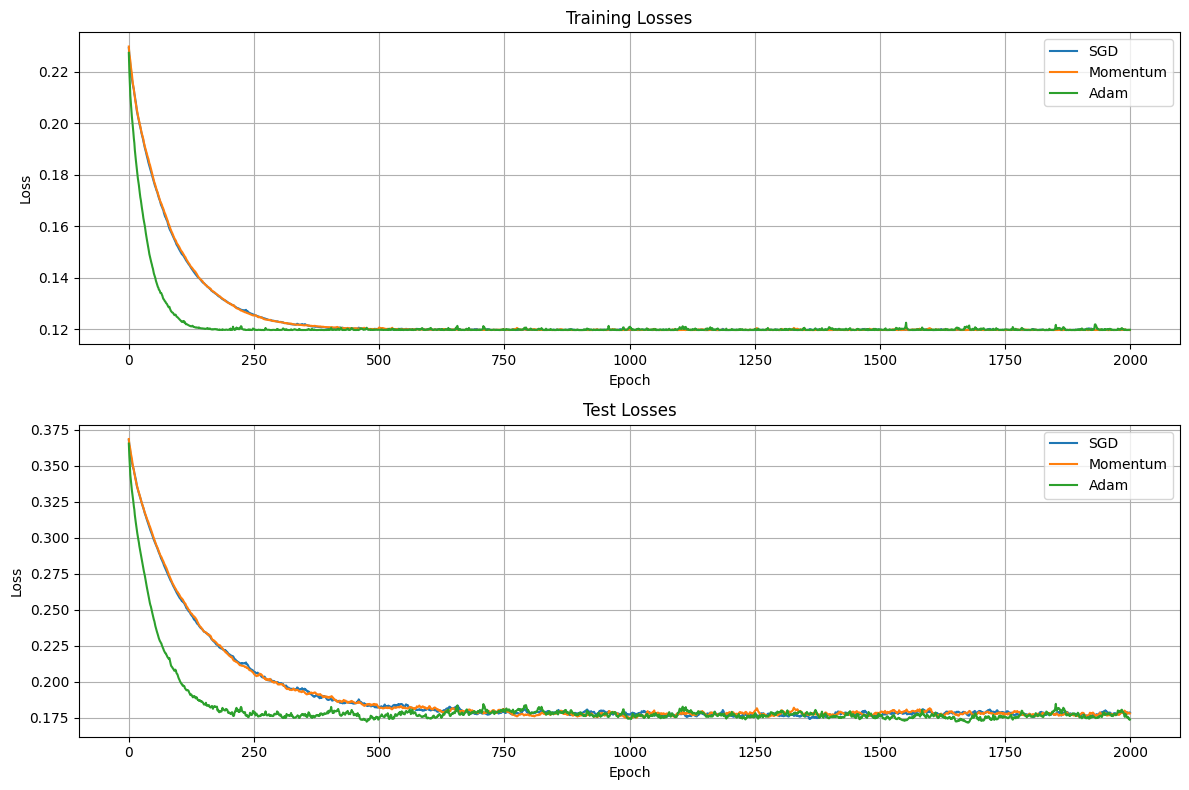

Final Loss for SGD: 0.17871526846096164
Final Loss for Adam: 0.17387841888950195
Final Loss for Momentum: 0.17815035757644676


In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(1234)
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

# Sinusoidal function
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

# Create data
x, y = create_toy_data(sinusoidal, 100, 0.25)  # Increase sample size for better train-test split

# Train-test split
split_ratio = 0.8
split_index = int(split_ratio * len(x))
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Add a bias term
X_train = np.vstack([np.ones_like(x_train), x_train]).T
X_test = np.vstack([np.ones_like(x_test), x_test]).T

# Initialize parameters
theta = np.random.randn(2)

# Hyperparameters
learning_rate = 0.001
epochs = 2000
beta1 = 0.9  # Momentum hyperparameter
beta2 = 0.999  # Adam hyperparameter
epsilon = 1e-8  # Adam hyperparameter

# Hypothesis function
def hypothesis(X, theta):
    return X.dot(theta)

# Loss function (Mean Squared Error)
def compute_loss(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    loss = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return loss

# Gradient computation
def compute_gradient(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    gradient = (1/m) * X.T.dot(predictions - y)
    return gradient

# SGD algorithm
def sgd(X_train, y_train, theta, learning_rate, epochs):
    train_loss_history = []
    val_loss_history = []
    m_train = len(y_train)

    for epoch in range(epochs):
        for i in range(m_train):
            random_index = np.random.randint(m_train)
            X_i = X_train[random_index:random_index+1]
            y_i = y_train[random_index:random_index+1]
            gradient = compute_gradient(X_i, y_i, theta)
            theta -= learning_rate * gradient
        train_loss = compute_loss(X_train, y_train, theta)
        val_loss = compute_loss(X_test, y_test, theta)
        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)

    return train_loss_history, val_loss_history, theta

# Momentum optimizer
def momentum_optimizer(X_train, y_train, theta, learning_rate, epochs, beta):
    train_loss_history = []
    val_loss_history = []
    m_train = len(y_train)
    momentum = np.zeros_like(theta)

    for epoch in range(epochs):
        for i in range(m_train):
            random_index = np.random.randint(m_train)
            X_i = X_train[random_index:random_index+1]
            y_i = y_train[random_index:random_index+1]
            gradient = compute_gradient(X_i, y_i, theta)
            momentum = beta * momentum + (1 - beta) * gradient
            theta -= learning_rate * momentum
        train_loss = compute_loss(X_train, y_train, theta)
        val_loss = compute_loss(X_test, y_test, theta)
        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)

    return train_loss_history, val_loss_history, theta

# Adam optimizer
def adam_optimizer(X_train, y_train, theta, learning_rate, epochs, beta1, beta2, epsilon):
    train_loss_history = []
    val_loss_history = []
    m_train = len(y_train)
    t = 0
    v = np.zeros_like(theta)
    s = np.zeros_like(theta)

    for epoch in range(epochs):
        for i in range(m_train):
            random_index = np.random.randint(m_train)
            X_i = X_train[random_index:random_index+1]
            y_i = y_train[random_index:random_index+1]
            gradient = compute_gradient(X_i, y_i, theta)
            t += 1
            v = beta1 * v + (1 - beta1) * gradient
            v_corrected = v / (1 - beta1**t)
            s = beta2 * s + (1 - beta2) * (gradient ** 2)
            s_corrected = s / (1 - beta2**t)
            theta -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)
        train_loss = compute_loss(X_train, y_train, theta)
        val_loss = compute_loss(X_test, y_test, theta)
        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)

    return train_loss_history, val_loss_history, theta

# Train with SGD optimizer
sgd_train_loss, sgd_val_loss, _ = sgd(X_train, y_train, theta.copy(), learning_rate, epochs)

# Train with Momentum optimizer
momentum_train_loss, momentum_val_loss, _ = momentum_optimizer(X_train, y_train, theta.copy(), learning_rate, epochs, beta1)

# Train with Adam optimizer
adam_train_loss, adam_val_loss, _ = adam_optimizer(X_train, y_train, theta.copy(), learning_rate, epochs, beta1, beta2, epsilon)

# Final losses
final_loss_sgd = compute_loss(X_test, y_test, sgd_theta)
final_loss_momentum = compute_loss(X_test, y_test, momentum_theta)
final_loss_adam = compute_loss(X_test, y_test, adam_theta)

# Plotting
plt.figure(figsize=(12, 8))

# First plot: Training losses
plt.subplot(2, 1, 1)
plt.plot(sgd_train_loss, label='SGD')
plt.plot(momentum_train_loss, label='Momentum')
plt.plot(adam_train_loss, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses')
plt.legend()
plt.grid(True)

# Second plot: Test losses
plt.subplot(2, 1, 2)
plt.plot(sgd_val_loss, label='SGD')
plt.plot(momentum_val_loss, label='Momentum')
plt.plot(adam_val_loss, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Losses')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Final Loss for SGD:", final_loss_sgd)
print("Final Loss for Adam:", final_loss_adam)
print("Final Loss for Momentum:", final_loss_momentum)


#Interpretation from Loss Curves: Adam, Momemtum, Sgd

The final losses for the three optimizers are as follows: SGD - 0.1787, Adam - 0.1739, and Momentum - 0.1782. Adam achieved the lowest final loss among the three, indicating its superior performance in minimizing the loss function. Momentum and SGD had slightly higher final losses, with Momentum being marginally better than SGD.

Examining the training loss plot, we observe that initially, all three optimizers show a rapid decrease in loss, indicating effective learning. However, as training progresses, the curves start to plateau, with Adam maintaining a consistently lower loss compared to the other two. Interestingly, the SGD and Momentum curves indeed align closely, suggesting  that Momentum, by considering past gradients during parameter updates, helps SGD (Stochastic Gradient Descent) behave more like advanced optimizers such as Adam. This alignment between the SGD and Momentum curves suggests that Momentum brings some of the benefits of more sophisticated optimization techniques to basic SGD.

Analyzing the test loss plot, we notice noise in all three curves, indicating fluctuations in the model's performance on unseen data during training. However, Adam consistently maintains the lowest test loss throughout, suggesting better generalization compared to SGD and Momentum. While Momentum exhibits slightly better performance than SGD.